<a href="https://colab.research.google.com/github/ckalo23/csc302_dataviz/blob/main/Copy_of_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1**. Please read WorldCupMatches.csv to a data frame to proceed

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wc_matches = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')
wc_matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953,300186488,NED,CRC
848,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,58141.0,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,300186474,BRA,GER
849,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),63267.0,0,0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955,300186490,NED,ARG
850,2014,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,68034.0,0,2,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957,300186502,BRA,NED


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q2** Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year. 

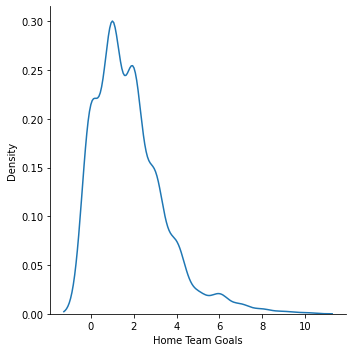

In [7]:
sns.displot(wc_matches['Home Team Goals'], kind = 'kde')

**Q3** Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn. Notice that labels are really clutterd. Then please refer to the earlier notebooks to have labels to appear on only select years which end with 0. You can use ax handle to call ax.set_xticklables(labels) for the labels your prepared.

[Text(0, 0, '1930'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '1950'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '1970'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '1990'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '2010'),
 Text(0, 0, '')]

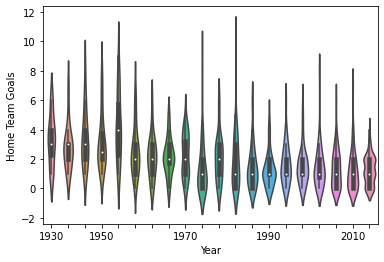

In [16]:
labels=[y if y%10==0 else None for y in list(wc_matches.Year.unique())]

ax = sns.violinplot(data=wc_matches, x='Year', y='Home Team Goals')
ax.set_xticklabels(labels)

**Q4** Please install joypy. Then visualize distributions for Home Team Goals and Away Team Goals' for each year. Once you visualize, please add  plt.style.use('seaborn-white') to see how colors change in your second run. Please also add the legend which you can find from the function prototype.



In [17]:
!pip install joypy

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


(<Figure size 640x480 with 21 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fc5b7460d50>])

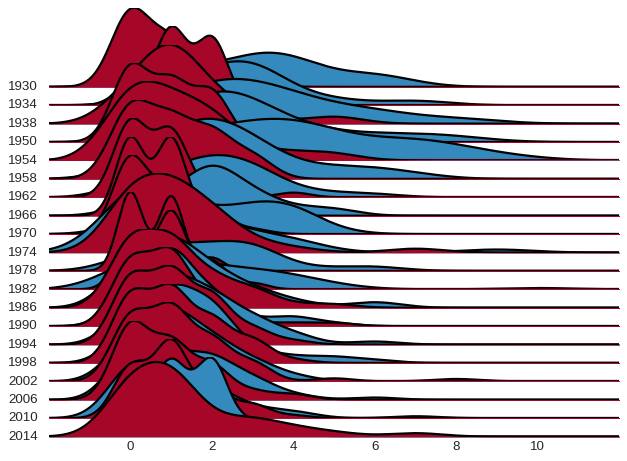

In [35]:
import joypy as jp

print(plt.style.available)
plt.style.use('seaborn-white')
jp.joyplot(data=wc_matches, column=['Home Team Goals', 'Away Team Goals'], by='Year', ylim='own')

**Q5** Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line. 

Then use your new data frame to visualize those total Home Team Goals for your top 5 countries (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

Notice that your x-axis will be having country initials, and y-axis will show the total number of Home Team Goals. 



In [54]:
ht_goals = wc_matches.groupby('Home Team Initials')['Home Team Goals'].count().reset_index()
ht_goals = ht_goals.sort_values(by='Home Team Goals', ascending=False)
ht_goals

,Home Team Initials,Home Team Goals
8,BRA,82
36,ITA,57
2,ARG,54
25,FRG,43
22,ENG,35
...,...,...
46,NOR,1
12,CHN,1
47,NZL,1
56,SCG,1


**Q6** Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer. Then use joyplot again to visualize densities for 'Home Team Goals' and	'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials'). Make sure that your legend is visible and use 'dark_background' by calling plt.style.use again.



(<Figure size 640x480 with 5 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fc5b7c3c950>])

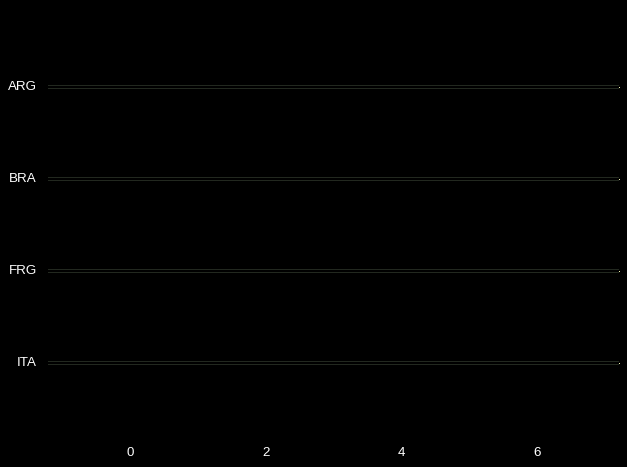

In [66]:
ht_goals_4 = ht_goals.iloc[0:4, :]

plt.style.use('dark_background')
jp.joyplot(data=wc_matches, column=['Home Team Goals', 'Away Team Goals'], by=ht_goals_4['Home Team Initials'], ylim='own')


**Q7** Please install seaborn_qqplot as shown below. Then draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals. Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

In [63]:
!pip install seaborn_qqplot

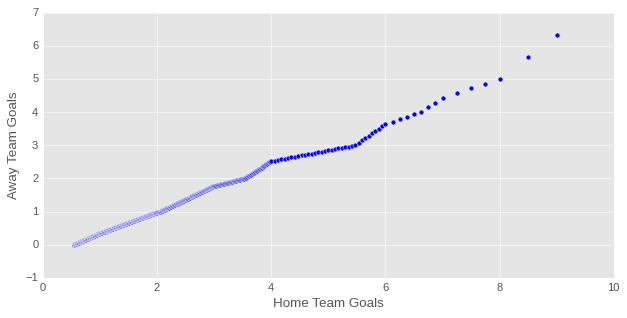

In [70]:
from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
plt.style.use('ggplot') #this is to change the color theme. 

pplot(wc_matches, x='Home Team Goals', y='Away Team Goals', kind = 'qq', height=4, aspect=2)

Unfortunately, I'm having some trouble with #6.  I can't really give an explanation in time for the submission.